# Projet : Réactions chimiques oscillantes.

**SECTION 1. Contexte.**

*Question 1.*

Le système (1.2) est équivalent au système (1.1) avec 

f : R^2 -> R^2
   (x,y) -> (A + x^2*y - (B+1)*x, B*x - x^2*y) = (x ̇,y ̇)
   
D'où z ̇(t) = f(z(t)) pour tout t entre 0 et T

In [786]:
from math import *
from numpy import *
import matplotlib.pyplot as plt

**SECTION 2. Résolution avec le schéma Euler explicite.**

*Question 1.*

In [787]:
def brusselator(A,B):
    def f(z):
        x=z[0]
        y=z[1]
        f1=A+(x**2)*y-(B+1)*x
        f2=B*x-(x**2)*y
        return array([f1,f2])
    return f

(A,B)=(1,3)
f=brusselator(A,B)
z=array([2,3])
f(z)    

array([ 5, -6])

*Question 2.*

In [788]:
def stepEuler(f,zt,h):
    return zt+h*f(zt)

*Question 3.*

In [789]:
def trajectoireEuler(z0, T, P, A, B):
    
    h = T / P
    
    Trajectoire = [z0]
    
    f=brusselator(A,B)
    
    for p in range(P):
        
       z_tilde = stepEuler(f,z0,h)
       
       Trajectoire.append(z_tilde)
       
       z0 = z_tilde
       
    return(array(Trajectoire))

*Question 4.*

In [790]:
trajectoireEuler(array([0,1]),18,1000,1,3)

array([[0.        , 1.        ],
       [0.018     , 1.        ],
       [0.03470983, 1.00096617],
       ...,
       [0.37457302, 3.26923254],
       [0.37386017, 3.28120307],
       [0.37319737, 3.29313639]])

*Question 5.*

In [791]:
trajectoireEuler(array([0,1]), 18, 1000, 1, 1.5)


array([[0.        , 1.        ],
       [0.018     , 1.        ],
       [0.03519583, 1.00048017],
       ...,
       [1.00857258, 1.49902811],
       [1.00863392, 1.49881246],
       [1.00869189, 1.49859908]])

*Question 6a.*

In [792]:
def plot_concentration(z0, T, P, A, B, Trajectoire):
    
    
    h = T / P
    
    xt = []
    yt = []   
    
    for i in range(P) :
        
        xt.append(Trajectoire[i][0])
        yt.append(Trajectoire[i][1])
 
    Tp = linspace(0,T,P)
    
    plt.plot(Tp,xt, 'b', linewidth=2, label='x(t)')
    plt.plot(Tp,yt, 'r', linewidth=2, label='y(t)')
    plt.xlabel('Temps')
    plt.ylabel('Concentration')
    plt.title('Evolution des concentrations')
    plt.legend()
    plt.savefig('evol-concentration.pdf')
    plt.show()

*Question 6b.*

In [793]:
def plot_trajectoire(z0, T, P, A, B, Trajectoire):
    
    h = T / P

    xt = 0
    yt = 0
    x = 0
    y = 0
    
    X = []
    Y = []
   
    for i in range(P) :
        
        xt = Trajectoire[i][0]
        yt = Trajectoire[i][1]
        x = A+(xt**2)*yt-(B+1)*xt
        y = B*xt-(xt**2)*yt
       
        X.append(x)
        Y.append(y)

    plt.plot(X,Y, 'b', linewidth=2, label='Trajectoire (x,y) des concentrations')
    plt.xlabel('Axe des abscisses (x)')
    plt.ylabel('Axe des ordonnées (y)')
    plt.title('Trajectoires des concentrations')
    plt.legend()
    plt.savefig('trajectoire.pdf')
    plt.show()

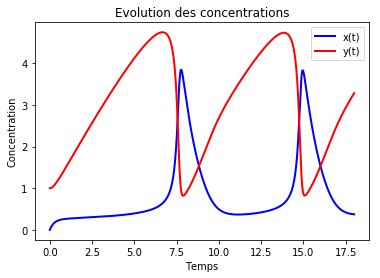

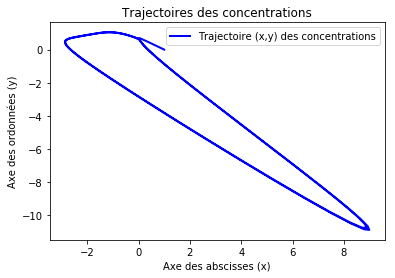

In [794]:
###Evolution Question 4

Trajectoire = trajectoireEuler(array([0,1]),18,1000,1,3)

plot_concentration(array([0,1]),18,1000,1,3, Trajectoire)
plot_trajectoire(array([0,1]),18,1000,1,3, Trajectoire)

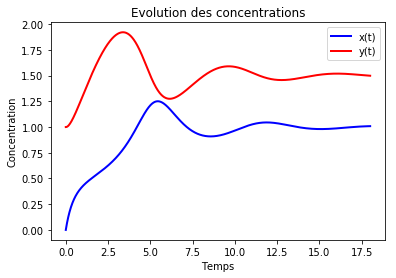

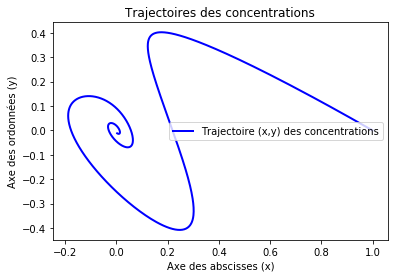

In [795]:
###Evolution Question 5

Trajectoire = trajectoireEuler(array([0,1]),18,1000,1,1.5)

plot_concentration(array([0,1]),18,1000,1,1.5, Trajectoire)
plot_trajectoire(array([0,1]),18,1000,1,1.5, Trajectoire)

**SECTION 3. Méthode Runge-Kutta d ordre 4.**

*Question 1.*

In [796]:
def stepRK4(f,zt,h):
    
    S2 = 0
    
    m = 6
    
    Gamma = array([16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55])
    Beta = array([[1/4,0,0,0,0], [3/32,9/32,0,0,0], [1932/2197,-7200/2197,7296/2197,0,0], 
              [439/216, -8, 3680/513, -845/4104,0], [-8/27, 2, -3544/2565, 1859/4104, -11/40]])
    
    def K(j):
        
        S1 = 0
        
        if j == 1 :
            return (f(zt))
        
        else :
            
            for l in range(1,j) :
                S1 = S1 + Beta[j-1,l-1]*K(l)
            
            return (f(zt + h * S1))
        
    for j in range(1,m):
        S2 = S2 + Gamma[j-1]*K(j)
        
    return(zt + h * S2)

*Question 2.*

In [797]:
def trajectoireRK4(z0, T, P, A, B):
    
    h = T / P
    
    Trajectoire = [z0]
    
    f=brusselator(A,B)
    
    for p in range(P):
        
       z_tilde = stepRK4(f,z0,h)
       
       Trajectoire.append(z_tilde)
       
       z0 = z_tilde
       
    return(array(Trajectoire))

In [798]:
###Exemple Question 4 Section 2

trajectoireRK4(array([0,1]),18,1000,1,3)

array([[0.        , 1.        ],
       [0.0174416 , 0.99991914],
       [0.03367663, 1.0007433 ],
       ...,
       [0.50002395, 2.66008893],
       [0.49410539, 2.67463408],
       [0.48839073, 2.68907996]])

In [799]:
###Exemple Question 5 Section 2

trajectoireRK4(array([0,1]), 18, 1000, 1, 1.5)

array([[0.        , 1.        ],
       [0.0176312 , 0.99981703],
       [0.0344909 , 1.00009729],
       ...,
       [1.00643134, 1.50703785],
       [1.00661502, 1.50674456],
       [1.00679525, 1.50645147]])

*Question 2.*

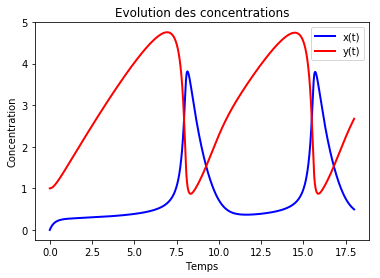

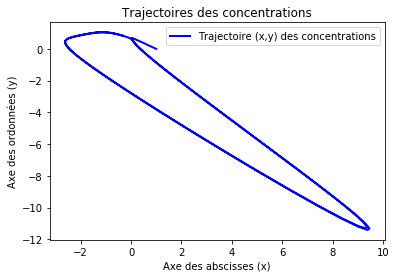

In [800]:
###Evolution Question 4 Section 2

Trajectoire = trajectoireRK4(array([0,1]),18,1000,1,3)

plot_concentration(array([0,1]),18,1000,1,3, Trajectoire)
plot_trajectoire(array([0,1]),18,1000,1,3, Trajectoire)

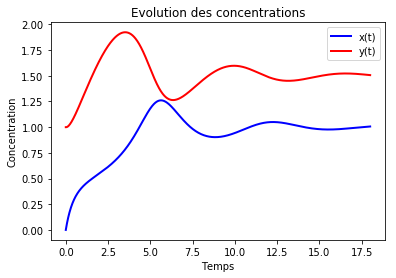

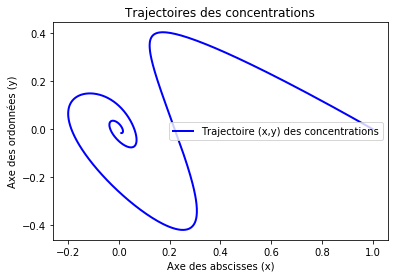

In [801]:
###Evolution Question 5 Section 2

Trajectoire = trajectoireRK4(array([0,1]),18,1000,1,1.5 )

plot_concentration(array([0,1]),18,1000,1,1.5, Trajectoire)
plot_trajectoire(array([0,1]),18,1000,1,1.5, Trajectoire)

**SECTION 4. Pas de temps adaptatif : Schéma RK45.**

*Question 1.*

In [802]:
def stepRK45(f,zt,hinit):
    
    epsmax = 10**(-5)
    m = 6
    
    Gamma = array([16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55])
    Gamma_barre = array([25/216,0,1408/2565,2197/4104,-1/5,0])
    Beta = array([[1/4,0,0,0,0], [3/32,9/32,0,0,0], [1932/2197,-7200/2197,7296/2197,0,0], 
                  [439/216, -8, 3680/513, -845/4104,0], [-8/27, 2, -3544/2565, 1859/4104, -11/40]])
    
    
    def K(j):
        
        S1 = 0
        
        if j == 1 :
            return (f(zt))
        
        else :
            
            for l in range(1,j) :
                S1 = S1 + Beta[j-1,l-1]*K(l)
            
            return (f(zt + hk * S1))
    

    def erreur(hk) :
        
        erreur = 0
        S = 0
        
        for l in range (1, m):
            
            S = S + (Gamma[l-1]-Gamma_barre[l-1])*K(l)
        
        erreur = max(abs(hk * S))
        
        return (erreur)
    
    
    
    def algoIteratif(hk) :
        
        hkplus1 = 0
    
        c = 0.9*(epsmax/erreur(hk))**(1/5)
    
        if c < 0.1 :
        
            hkplus1 = 0.1 * hk
        
        if c > 5 :
        
            hkplus1 = 5 * hk
        
        if c >= 0.1 and c <= 5 :
        
            hkplus1 = c * hk
            
        return(hkplus1)
    
    
    hk = hinit
    hkplus1 = algoIteratif(hk)
    
    while erreur(hk) > epsmax :
        
        hk = hkplus1
        hkplus1 = algoIteratif(hk)

        
    hnext = 0
        
    if erreur(hk) <=  epsmax :
        
        hnext = hk
        hinit = hkplus1
    
    return(stepRK4(f,zt,hnext),hinit)

*Question 2.*

In [803]:
def trajectoireRK45(z0, T, P, A, B):
    
    h0 = T / P
    
    f=brusselator(A,B)
    
    Trajectoire = [z0]
    
    H = [h0]

    
    for p in range(P):
        
        (z_tilde, h) = stepRK45(f,z0,h0)
        
        h0 = h
        
        z0 = z_tilde
       
        Trajectoire.append(z_tilde)
        H.append(h)
       
    return(array([Trajectoire,H]))

In [804]:
###Exemple Question 4 Section 2

trajectoireRK45(array([0,1]),18,1000,1,3)[0]

array([array([0, 1]), array([2.58471967e-04, 9.99999836e-01]),
       array([4.91968531e-04, 9.99999882e-01]), ...,
       array([0.15563339, 1.06132273]), array([0.15577735, 1.06147998]),
       array([0.155921  , 1.06163724])], dtype=object)

In [805]:
###Exemple Question 5 Section 2

trajectoireRK45(array([0,1]), 18, 1000, 1, 1.5)[0]

array([array([0, 1]), array([2.58640270e-04, 9.99999917e-01]),
       array([4.92367476e-04, 9.99999940e-01]), ...,
       array([0.15622241, 1.02276984]), array([0.15637842, 1.02282127]),
       array([0.15653443, 1.02287277])], dtype=object)

*Question 3.*

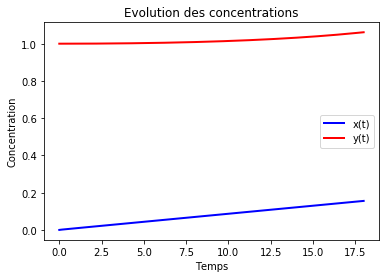

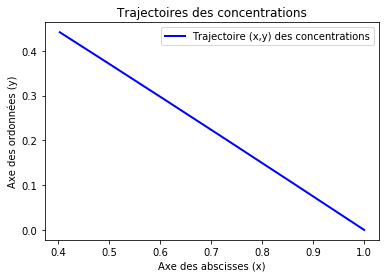

In [806]:
###Evolution Question 4 Section 2

Trajectoire = trajectoireRK45(array([0,1]),18,1000,1,3)[0]

plot_concentration(array([0,1]),18,1000,1,3, Trajectoire)
plot_trajectoire(array([0,1]),18,1000,1,3, Trajectoire)

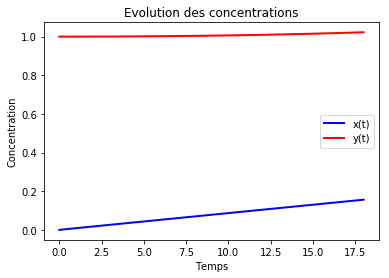

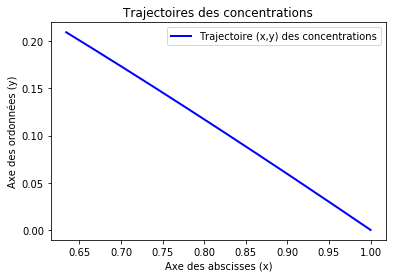

In [807]:
###Evolution Question 5 Section 2

Trajectoire = trajectoireRK45(array([0,1]),18,1000,1,1.5)[0]

plot_concentration(array([0,1]),18,1000,1,1.5, Trajectoire)
plot_trajectoire(array([0,1]),18,1000,1,1.5, Trajectoire)

*Question 4.*

In [808]:
def plot_pasdetemps(z0, T, A, B, H):
 
    Tp = linspace(0,T,len(H))
    
    plt.plot(Tp,H, 'r', linewidth=2, label='y(t)')
    plt.xlabel('Temps')
    plt.ylabel('Pas de Temps')
    plt.title('Evolution des pas de temps')
    plt.legend()
    plt.savefig('evol-pasdetemps.pdf')
    plt.show()

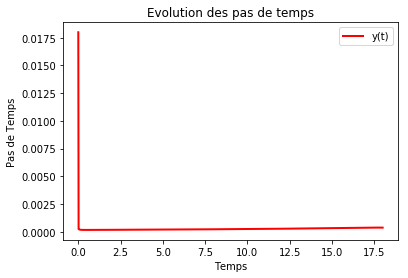

In [809]:
###Evolution Pas de temps Question 4 Section 2

H = trajectoireRK45(array([0,1]),18,1000,1,3)[1]

plot_pasdetemps(array([0,1]),18,1,3, H)

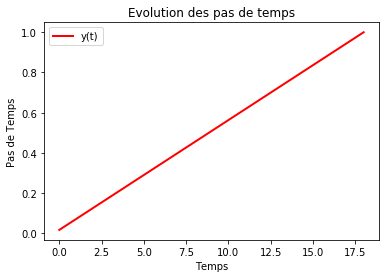

In [810]:
###Evolution Pas de temps Question 5 Section 2

Trajectoire = trajectoireRK4(array([0,1]),18,1000,1,1.5)[1]

plot_pasdetemps(array([0,1]),18,1,1.5, Trajectoire)